In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./training_data_08-24-2022-19-39-58.csv')

# Analyse Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  4226 non-null   int64
 1   i_sensor_1  4226 non-null   int64
 2   i_sensor_2  4226 non-null   int64
 3   i_sensor_3  4226 non-null   int64
 4   o_left      4226 non-null   bool 
 5   o_right     4226 non-null   bool 
dtypes: bool(2), int64(4)
memory usage: 140.4 KB


<AxesSubplot:>

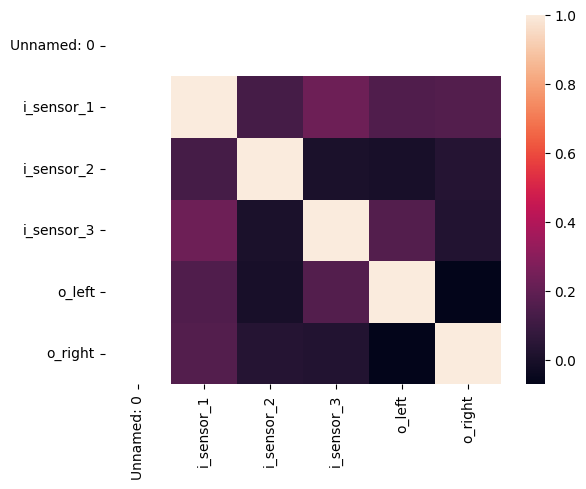

In [4]:
import seaborn as sns
sns.heatmap(df.corr())

# Scale/convert input values

In [5]:
df = df.astype({'o_left': int, 'o_right': int})   

In [6]:
df.head()

,Unnamed: 0,i_sensor_1,i_sensor_2,i_sensor_3,o_left,o_right
0,0,-1,187,79,0,0
1,0,-1,181,79,0,0
2,0,-1,175,79,0,0
3,0,-1,169,79,0,0
4,0,-1,163,79,0,0


In [7]:
df[df['o_left']==1]

,Unnamed: 0,i_sensor_1,i_sensor_2,i_sensor_3,o_left,o_right
279,0,-1,85,178,1,0
511,0,298,289,204,1,0
540,0,270,246,239,1,0
544,0,263,243,266,1,0
547,0,260,288,298,1,0
...,...,...,...,...,...,...
3743,0,277,93,262,1,0
3745,0,262,88,274,1,0
3753,0,231,89,280,1,0
3945,0,-1,105,119,1,0


# Set Train and test 

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop(['o_left','o_right','Unnamed: 0'],axis=1).values
y = df[['o_left','o_right']].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

# Create neural network

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [10]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
model = Sequential()
X_train.shape

2022-08-24 19:50:08.585056: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-08-24 19:50:08.585181: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: G15-5510
2022-08-24 19:50:08.585216: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: G15-5510
2022-08-24 19:50:08.585548: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.85.2
2022-08-24 19:50:08.585630: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 510.85.2
2022-08-24 19:50:08.585649: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 510.85.2
2022-08-24 19:50:08.586545: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in 

(2958, 3)

In [11]:
model.add(Dense(units=8, input_dim=3,activation='relu'))

model.add(Dense(units=8,activation='relu'))

model.add(Dense(units=8,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam')

# Train model

In [12]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=150,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/150
93/93 [==============================] - 0s 2ms/step - loss: 2.0162 - val_loss: 0.7238
Epoch 2/150
93/93 [==============================] - 0s 956us/step - loss: 0.3898 - val_loss: 0.3401
Epoch 3/150
93/93 [==============================] - 0s 930us/step - loss: 0.2796 - val_loss: 0.2834
Epoch 4/150
93/93 [==============================] - 0s 933us/step - loss: 0.2537 - val_loss: 0.2755
Epoch 5/150
93/93 [==============================] - 0s 926us/step - loss: 0.2400 - val_loss: 0.2482
Epoch 6/150
93/93 [==============================] - 0s 1ms/step - loss: 0.2303 - val_loss: 0.2486
Epoch 7/150
93/93 [==============================] - 0s 951us/step - loss: 0.2254 - val_loss: 0.2354
Epoch 8/150
93/93 [==============================] - 0s 962us/step - loss: 0.2241 - val_loss: 0.2424
Epoch 9/150
93/93 [==============================] - 0s 938us/step - loss: 0.2211 - val_loss: 0.2315
Epoch 10/150
93/93 [==============================] - 0s 921us/step - loss: 0.2183 - val_loss: 

93/93 [==============================] - 0s 947us/step - loss: 0.2073 - val_loss: 0.2257
Epoch 82/150
93/93 [==============================] - 0s 954us/step - loss: 0.2067 - val_loss: 0.2238
Epoch 83/150
93/93 [==============================] - 0s 986us/step - loss: 0.2060 - val_loss: 0.2264
Epoch 84/150
93/93 [==============================] - 0s 932us/step - loss: 0.2075 - val_loss: 0.2258
Epoch 85/150
93/93 [==============================] - 0s 930us/step - loss: 0.2059 - val_loss: 0.2286
Epoch 86/150
93/93 [==============================] - 0s 924us/step - loss: 0.2084 - val_loss: 0.2229
Epoch 87/150
93/93 [==============================] - 0s 933us/step - loss: 0.2062 - val_loss: 0.2269
Epoch 88/150
93/93 [==============================] - 0s 954us/step - loss: 0.2063 - val_loss: 0.2242
Epoch 89/150
93/93 [==============================] - 0s 914us/step - loss: 0.2070 - val_loss: 0.2270
Epoch 90/150
93/93 [==============================] - 0s 931us/step - loss: 0.2065 - val_loss: 

In [13]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

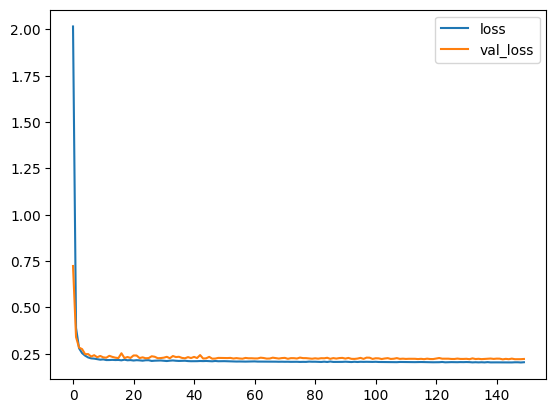

In [14]:
model_loss.plot()

In [15]:
model.save('car_game_model.h5')

pygame 2.1.2 (SDL 2.0.16, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
1/1 [==============================] - 0s 52ms/step
[[0.9010378  0.09896221]]
left
1/1 [==============================] - 0s 10ms/step
[[0.46672812 0.5332719 ]]
1/1 [==============================] - 0s 10ms/step
[[0.45280784 0.54719216]]
1/1 [==============================] - 0s 11ms/step
[[0.46163052 0.5383695 ]]
1/1 [==============================] - 0s 11ms/step
[[0.45280784 0.54719216]]
1/1 [==============================] - 0s 10ms/step
[[0.46163052 0.5383695 ]]
1/1 [==============================] - 0s 10ms/step
[[0.44267127 0.55732876]]
1/1 [==============================] - 0s 10ms/step
[[0.45145878 0.54854125]]
1/1 [==============================] - 0s 10ms/step
[[0.45145878 0.54854125]]
1/1 [==============================] - 0s 10ms/step
[[0.3860081  0.61399186]]
1/1 [==============================] - 0s 10ms/step
[[0.2784411 0.7215589]]
1/1 [=====================

1/1 [==============================] - 0s 10ms/step
[[0.31312975 0.6868702 ]]
1/1 [==============================] - 0s 10ms/step
[[0.00473236 0.9952676 ]]
right
1/1 [==============================] - 0s 10ms/step
[[0.27605233 0.72394764]]
1/1 [==============================] - 0s 10ms/step
[[0.24311003 0.75689   ]]
1/1 [==============================] - 0s 10ms/step
[[0.19613679 0.80386317]]
1/1 [==============================] - 0s 10ms/step
[[0.15037157 0.8496285 ]]
1/1 [==============================] - 0s 10ms/step
[[0.14747217 0.85252786]]
1/1 [==============================] - 0s 10ms/step
[[0.14437243 0.8556275 ]]
1/1 [==============================] - 0s 10ms/step
[[0.14156944 0.8584305 ]]
1/1 [==============================] - 0s 10ms/step
[[0.13958547 0.8604145 ]]
1/1 [==============================] - 0s 10ms/step
[[0.13709605 0.86290395]]
1/1 [==============================] - 0s 10ms/step
[[0.13441204 0.865588  ]]
1/1 [==============================] - 0s 10ms/step
[[0.13

1/1 [==============================] - 0s 10ms/step
[[0.17354044 0.8264596 ]]
1/1 [==============================] - 0s 10ms/step
[[0.17354044 0.8264596 ]]
1/1 [==============================] - 0s 10ms/step
[[0.17354044 0.8264596 ]]
1/1 [==============================] - 0s 10ms/step
[[0.17354044 0.8264596 ]]
1/1 [==============================] - 0s 10ms/step
[[0.17354044 0.8264596 ]]
1/1 [==============================] - 0s 10ms/step
[[0.17354044 0.8264596 ]]
